# Modelado Motor de Corriente Continua e imán permanente: Identificación FOPTD

principales comando de Python usados: de la biblioteca **pyhton-control:** , tf

<div class="alert alert-block alert-warning">
<b>Warning: </b> El siguiente notebook fue ejecutado con las versiones de la librería de python-control:  0.9.3:
</div> 

- [Identificación FOPTD](#id_ident_motor1)
- [Citas y Referencias](#id_ident_motor2)

<a id="id_ident_motor1"></a>
## Identificación FOPDT
En este caso ajustamos la respuesta temporal del motor de corriente continua a una función de transferencia de primer orden. Los datos son importados de un archivo .mat de Matlab(r) con una función de scipy que permite importar este tipo de archivos, hay una alternativa pero no me funcionó (la biblioteca es mat4py). Una opción es guardar los datos en un .npy o .npz (me queda pendiente).

In [1]:
import control as ctrl
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio
print('control',ctrl.__version__)

control 0.9.3.post2


In [2]:
vel_pos_motor=sio.loadmat('vel_pos_mot1.mat')

El archivo original es estructurado con los datos del Tacometro taco = velocidad angular, tensión en un potenciometro multivueltas, pote = posición angular y una medida de la corriente obtenida en pin8 desde el PWM del motor. Las tensiones de entrada $V_{in}$ son 0.2, 0.5, 0.7, 1.2, 1.5, 1.7 y 2.0 V de tensión en la entrada del PWM. 

In [3]:
sorted(vel_pos_motor.keys())

['Vin_0p2_mot1',
 'Vin_0p5_mot1',
 'Vin_0p7_mot1',
 'Vin_1p0_mot1',
 'Vin_1p2_mot1',
 'Vin_1p5_mot1',
 'Vin_1p7_mot1',
 'Vin_2p0_mot1',
 '__globals__',
 '__header__',
 '__version__']

In [4]:
Vin_0p2_mot1=vel_pos_motor['Vin_0p2_mot1']
Vin_0p2_mot1.dtype #datos en cada estructura

dtype([('taco', 'O'), ('pote', 'O'), ('pin8', 'O'), ('Vin', 'O')])

Se obtiene la velocidad estacionaria para cada caso a partir de la media de los últimos 20 datos  y son guardados en $w_{ss}$

In [5]:
w_ss=np.zeros((7))
w_ss[0]=np.mean(vel_pos_motor['Vin_0p2_mot1']['taco'][0][0][0][0][1][0][0][0][:][-1-20:-1])
w_ss[1]=np.mean(vel_pos_motor['Vin_0p5_mot1']['taco'][0][0][0][0][1][0][0][0][:][-1-20:-1])
w_ss[2]=np.mean(vel_pos_motor['Vin_0p7_mot1']['taco'][0][0][0][0][1][0][0][0][:][-1-20:-1])
w_ss[3]=np.mean(vel_pos_motor['Vin_1p2_mot1']['taco'][0][0][0][0][1][0][0][0][:][-1-20:-1])
w_ss[4]=np.mean(vel_pos_motor['Vin_1p5_mot1']['taco'][0][0][0][0][1][0][0][0][:][-1-20:-1])
w_ss[5]=np.mean(vel_pos_motor['Vin_1p7_mot1']['taco'][0][0][0][0][1][0][0][0][:][-1-20:-1])
w_ss[6]=np.mean(vel_pos_motor['Vin_2p0_mot1']['taco'][0][0][0][0][1][0][0][0][:][-1-20:-1])
w_ss

array([0.03687424, 0.54554335, 0.90744811, 1.77606838, 2.34151404,
       2.68253968, 3.24285714])

Se obtiene el $K=\frac{\Delta Y}{\Delta U}$ en forma vectorial para cada señal de velocidad para los distintos valores de tensión de entrada $Vin$

In [50]:
Vin=np.array([.2,.5,.7,1.2,1.5,1.7,2.0])
K=np.multiply(w_ss,1/Vin)

|$V_{in}$ | $K$ | $\tau$ |
|---------|-----|-----------|
|0.2 | 0.18437118 | 1.45 |
|0.5 | 1.09108669 | 1.45 |
|0.7 | 1.29635444 | 1.45 |
|1.2 | 1.48005698 | 1.45 |
|1.5 | 1.56100936 | 1.45 |
|1.7 | 1.57796452 | 1.45 |
|2.0 | 1.62142857 | 1.45 |

In [7]:
w_tau=w_ss*.63
t=vel_pos_motor['Vin_1p2_mot1']['taco'][0][0][0][0][0]

tau=1.45

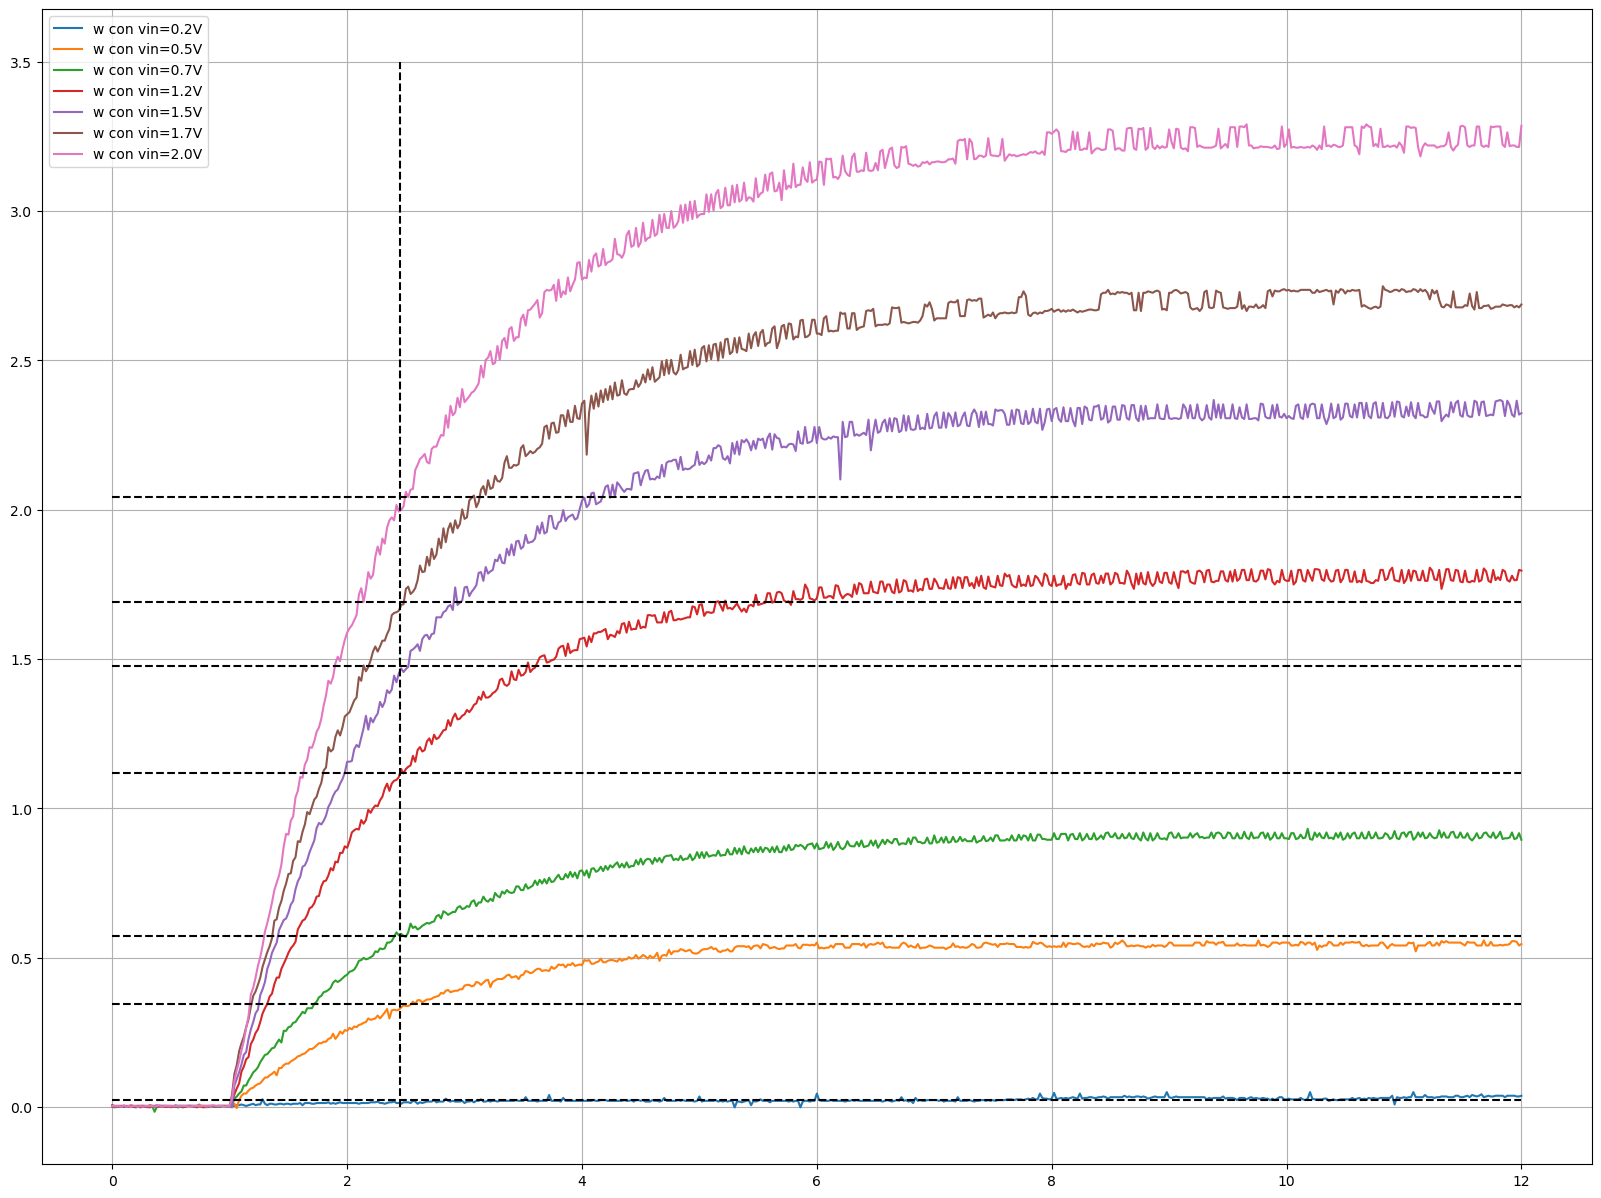

In [8]:
plt.figure(figsize=(20,15))
plt.plot(vel_pos_motor['Vin_0p2_mot1']['taco'][0][0][0][0][0],vel_pos_motor['Vin_0p2_mot1']['taco'][0][0][0][0][1][0][0][0][:],label= r'w con vin=0.2V')
plt.plot(vel_pos_motor['Vin_0p5_mot1']['taco'][0][0][0][0][0],vel_pos_motor['Vin_0p5_mot1']['taco'][0][0][0][0][1][0][0][0][:],label= r'w con vin=0.5V')
plt.plot(vel_pos_motor['Vin_0p7_mot1']['taco'][0][0][0][0][0],vel_pos_motor['Vin_0p7_mot1']['taco'][0][0][0][0][1][0][0][0][:],label= r'w con vin=0.7V')
plt.plot(vel_pos_motor['Vin_1p2_mot1']['taco'][0][0][0][0][0],vel_pos_motor['Vin_1p2_mot1']['taco'][0][0][0][0][1][0][0][0][:],label= r'w con vin=1.2V')
plt.plot(vel_pos_motor['Vin_1p5_mot1']['taco'][0][0][0][0][0],vel_pos_motor['Vin_1p5_mot1']['taco'][0][0][0][0][1][0][0][0][:],label= r'w con vin=1.5V')
plt.plot(vel_pos_motor['Vin_1p7_mot1']['taco'][0][0][0][0][0],vel_pos_motor['Vin_1p7_mot1']['taco'][0][0][0][0][1][0][0][0][:],label= r'w con vin=1.7V')
plt.plot(vel_pos_motor['Vin_2p0_mot1']['taco'][0][0][0][0][0],vel_pos_motor['Vin_2p0_mot1']['taco'][0][0][0][0][1][0][0][0][:],label= r'w con vin=2.0V')
plt.grid()
plt.legend()


plt.hlines(w_tau,0,t[-1],'k', linestyles='dashed')
plt.vlines(tau+1,0,3.5,'k', linestyles='dashed')#tau=1.45

En P_E2theta se crea un array de funciones de transferencia para los distintos valores de $K$, esto muestra el caracter no lineal del sistema que se hace mas evidente a bajas revoluciones, donde los rozamientos estáticos y dinámicos se hacen más notables, observar en particular el caso de $V_in=0.2V$ muestra algunas oscilaciones en el estacionario.

In [19]:
s = ctrl.tf('s');
P_E2theta = [K[0]/(tau*s+1),K[1]/(tau*s+1),K[2]/(tau*s+1),K[3]/(tau*s+1),K[4]/(tau*s+1),K[5]/(tau*s+1),K[6]/(tau*s+1)]

In [20]:
u = np.zeros(len(t))
u[round(len(t)/11):]=1.0

_,w1=ctrl.forced_response(P_E2theta[0],T=t.T,U=u*.2)
_,w2=ctrl.forced_response(P_E2theta[1],T=t.T,U=u*.5)
_,w3=ctrl.forced_response(P_E2theta[2],T=t.T,U=u*.7)
_,w4=ctrl.forced_response(P_E2theta[3],T=t.T,U=u*1.2)
_,w5=ctrl.forced_response(P_E2theta[4],T=t.T,U=u*1.5)
_,w6=ctrl.forced_response(P_E2theta[5],T=t.T,U=u*1.7)
_,w7=ctrl.forced_response(P_E2theta[6],T=t.T,U=u*2)

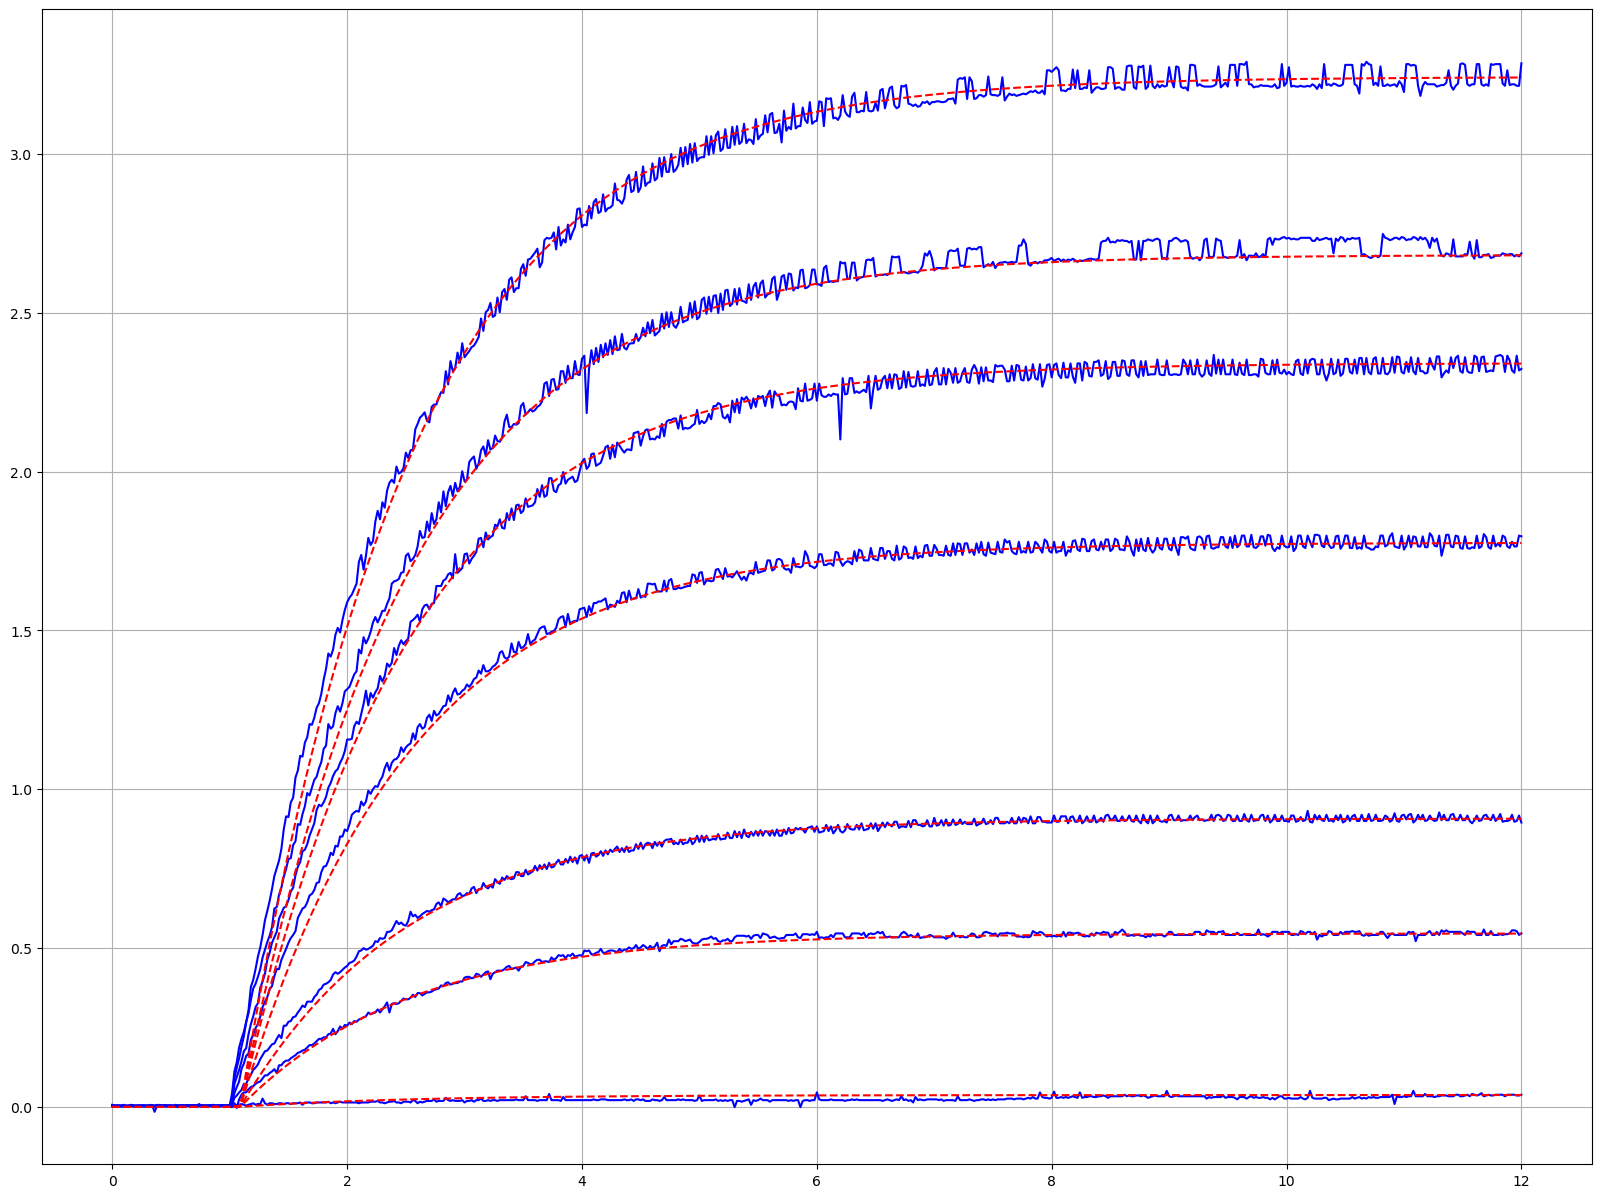

In [30]:
plt.figure(figsize=(20,15))
plt.plot(t,vel_pos_motor['Vin_0p2_mot1']['taco'][0][0][0][0][1][0][0][0][:],'b',t,w1,'r--')
plt.plot(t,vel_pos_motor['Vin_0p5_mot1']['taco'][0][0][0][0][1][0][0][0][:],'b',t,w2,'r--')
plt.plot(t,vel_pos_motor['Vin_0p7_mot1']['taco'][0][0][0][0][1][0][0][0][:],'b',t,w3,'r--')
plt.plot(t,vel_pos_motor['Vin_1p2_mot1']['taco'][0][0][0][0][1][0][0][0][:],'b',t,w4,'r--')
plt.plot(t,vel_pos_motor['Vin_1p5_mot1']['taco'][0][0][0][0][1][0][0][0][:],'b',t,w5,'r--')
plt.plot(t,vel_pos_motor['Vin_1p7_mot1']['taco'][0][0][0][0][1][0][0][0][:],'b',t,w6,'r--')
plt.plot(t,vel_pos_motor['Vin_2p0_mot1']['taco'][0][0][0][0][1][0][0][0][:],'b',t,w7,'r--')
plt.grid()

Ajustamos el valor de K al promedio de los valores mas representativos.

In [28]:
K1=np.mean(K[3:])
P= ctrl.tf(K1,[tau,1])
P

TransferFunction(array([1.56011486]), array([1.45, 1.  ]))

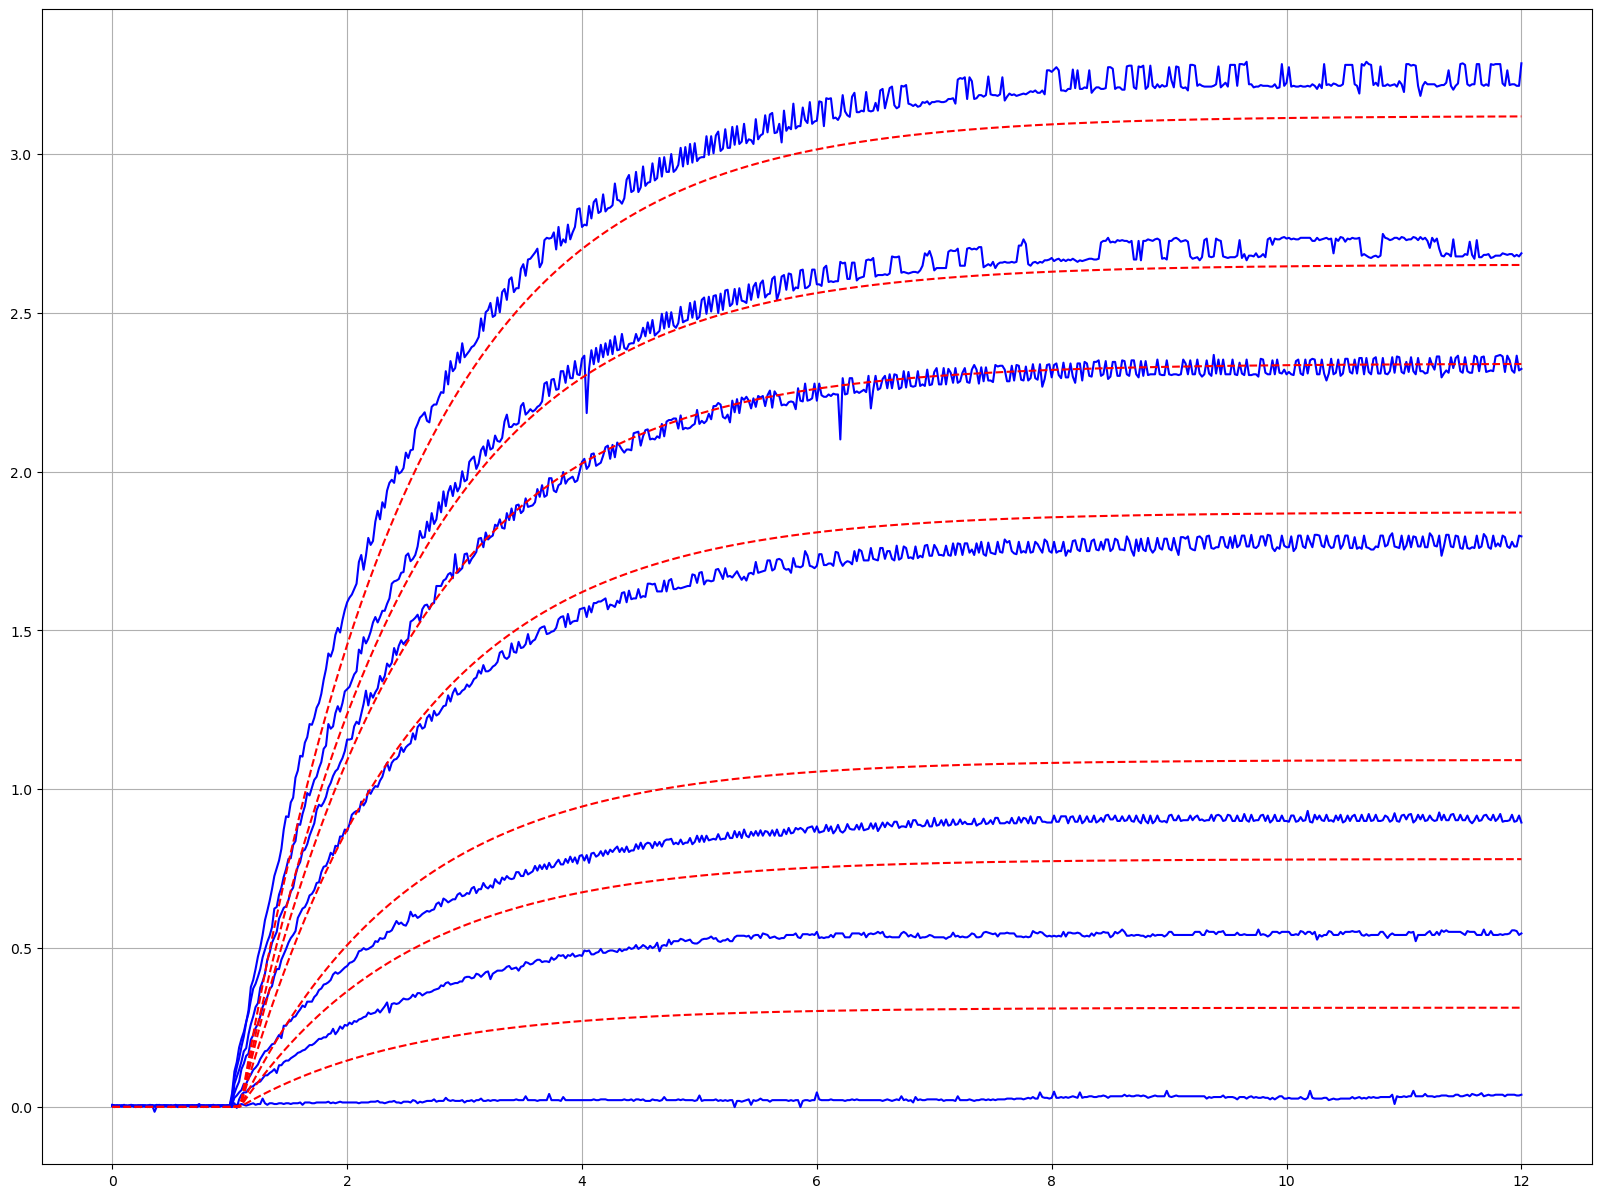

In [31]:
_,w=ctrl.forced_response(P,T=t.T,U=u)
plt.figure(figsize=(20,15))
plt.plot(t,vel_pos_motor['Vin_0p2_mot1']['taco'][0][0][0][0][1][0][0][0][:],'b',t,w*.2,'r--')
plt.plot(t,vel_pos_motor['Vin_0p5_mot1']['taco'][0][0][0][0][1][0][0][0][:],'b',t,w*.5,'r--')
plt.plot(t,vel_pos_motor['Vin_0p7_mot1']['taco'][0][0][0][0][1][0][0][0][:],'b',t,w*.7,'r--')
plt.plot(t,vel_pos_motor['Vin_1p2_mot1']['taco'][0][0][0][0][1][0][0][0][:],'b',t,w*1.2,'r--')
plt.plot(t,vel_pos_motor['Vin_1p5_mot1']['taco'][0][0][0][0][1][0][0][0][:],'b',t,w*1.5,'r--')
plt.plot(t,vel_pos_motor['Vin_1p7_mot1']['taco'][0][0][0][0][1][0][0][0][:],'b',t,w*1.7,'r--')
plt.plot(t,vel_pos_motor['Vin_2p0_mot1']['taco'][0][0][0][0][1][0][0][0][:],'b',t,w*2.0,'r--')
plt.grid()

En el gráfico anterior es notable la diferencia que hay entre el modelo lineal que ajustamos con la función de primer orden elegida, esto no impide seguir adelante con el objetivo de diseño de un controlador para este sistema. Lo ideal, para la implementación de un controlador, dentro de lo posible, es linealizar el sistema normalizando $V_{in}$ y eleminando la banda muerta.

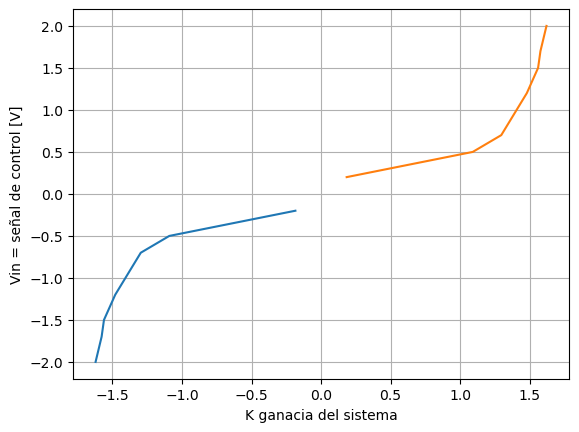

In [55]:
plt.plot(-1*K,-1*Vin,K,Vin,label='K vs Vin')
plt.xlabel('K = ganacia del sistema')
plt.ylabel('Vin = señal de control [V]')
plt.grid()

<a id="id_ident_motor2"></a>
## Citas y Referencias:

<div class="alert alert-block alert-info">
<b></b> Por ahora dejo las citas y referencia con este formato, si encuentro algo mejor lo cambio.
</div>

___
<a id="i_motor_cite1"></a>
**REF#1: Process Dynamics and Control - BYU**.

title = Graphical Method: FOPDT to Step Test   
url = https://apmonitor.com/pdc/index.php/Main/FirstOrderGraphical
note = Accessed: 2023-04-2  



<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Licencia Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/88x31.png" /></a><br />Esta obra está bajo una <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Licencia Creative Commons Atribución 4.0 Internacional</a>.